In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df_all = pd.read_csv('Kaagle_Upload.csv')
df_all.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df_all[['journey_purpose_of_driver', 'accident_severity', 'road_type', 'junction_detail', 'junction_control', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'day_of_week', 'age_of_driver', 'age_of_vehicle']]
print(df.shape)
df.head()

(285331, 14)


,journey_purpose_of_driver,accident_severity,road_type,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,day_of_week,age_of_driver,age_of_vehicle
0,6,3,6,3,4,1,1,1,0,0,1,2,45,11
1,6,3,3,6,2,1,1,1,0,0,1,7,25,1
2,6,3,3,6,2,1,1,1,0,0,1,7,51,-1
3,1,3,6,0,-1,1,1,1,0,0,1,4,50,1
4,6,3,6,3,4,1,1,1,0,0,1,6,27,-1


In [11]:
# remove all -1 values as they indicate data is missing
df = df[df['age_of_vehicle'] != -1]
df = df[df['age_of_driver'] != -1]
df = df[df['day_of_week'] != -1]
df = df[df['urban_or_rural_area'] != 3]
df = df[df['carriageway_hazards'] != -1]
df = df[df['special_conditions_at_site'] != -1]
df = df[df['road_surface_conditions'] != -1]
df = df[df['weather_conditions'] != -1]
df = df[df['light_conditions'] != -1]
df = df[df['junction_control'] != -1]
df = df[df['junction_detail'] != -1]
df = df[df['road_type'] != -1]
df = df[df['journey_purpose_of_driver'] != -1]
df = df[df['accident_severity'] != -1]
df.shape


(110842, 14)

### Sort by Road Type

In [12]:
df['road_type'].unique()

array([6, 3, 9, 1, 2, 7], dtype=int64)

In [13]:
df_rtac = df[['road_type', 'accident_severity']]
indexnames9 = df_rtac[df_rtac['road_type'] == 9].index
df_rtac.drop(indexnames9, inplace=True)

df_rtac['road_type'] = df_rtac['road_type'].replace(1, 'roundabout')
df_rtac['road_type'] = df_rtac['road_type'].replace(2, 'One way street')
df_rtac['road_type'] = df_rtac['road_type'].replace(3, 'dual carriageway')
df_rtac['road_type'] = df_rtac['road_type'].replace(6, 'single carriageway')
df_rtac['road_type'] = df_rtac['road_type'].replace(7, 'slip road')
df_rtac

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,road_type,accident_severity
0,single carriageway,3
1,dual carriageway,3
6,dual carriageway,3
7,dual carriageway,3
8,dual carriageway,3
...,...,...
285307,single carriageway,3
285312,single carriageway,3
285313,single carriageway,3
285314,single carriageway,3


In [14]:
df_rtac3 = df_rtac[df_rtac['accident_severity'] == 3]
df_rtac2 = df_rtac[df_rtac['accident_severity'] == 2]
df_rtac1 = df_rtac[df_rtac['accident_severity'] == 1]

print(df_rtac3['road_type'].unique())
print(df_rtac2['road_type'].unique())
print(df_rtac1['road_type'].unique())

['single carriageway' 'dual carriageway' 'roundabout' 'One way street'
 'slip road']
['single carriageway' 'roundabout' 'dual carriageway' 'One way street'
 'slip road']
['single carriageway' 'roundabout' 'dual carriageway' 'One way street'
 'slip road']


In [15]:
y3 = df_rtac3['road_type'].value_counts()
y3.to_frame()
df_rtactot = pd.DataFrame({'accident severity 3': y3})
df_rtactot

,accident severity 3
single carriageway,71001
dual carriageway,11169
roundabout,11035
One way street,1696
slip road,1415


In [16]:
y2 = df_rtac2['road_type'].value_counts()
y2.to_list()
df_rtactot.insert(1, 'accident severity 2', y2, True)
df_rtactot

,accident severity 3,accident severity 2
single carriageway,71001,10426
dual carriageway,11169,1398
roundabout,11035,1071
One way street,1696,213
slip road,1415,126


In [17]:
y1 = df_rtac1['road_type'].value_counts()
y2.to_list()
df_rtactot.insert(2, 'accident severity 1', y1, True)
df_rtactot

,accident severity 3,accident severity 2,accident severity 1
single carriageway,71001,10426,672
dual carriageway,11169,1398,140
roundabout,11035,1071,40
One way street,1696,213,22
slip road,1415,126,3


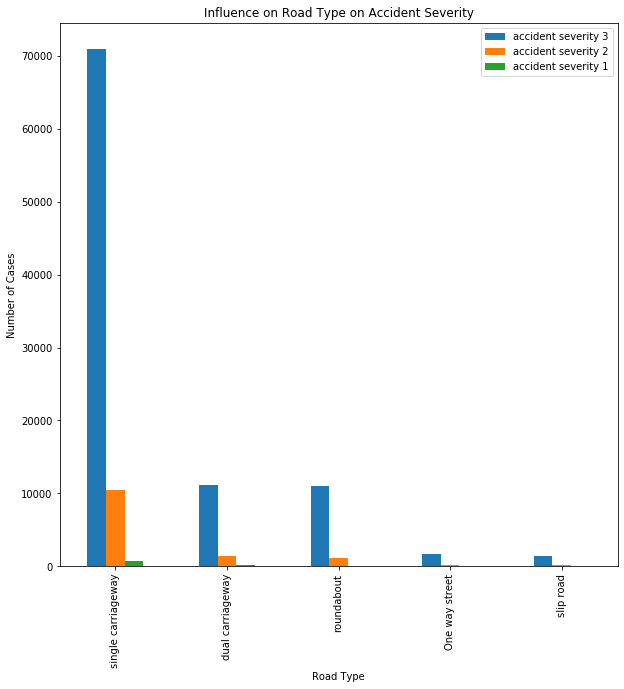

In [18]:
df_rtactot.plot(kind='bar', figsize=(10, 10))

plt.xlabel('Road Type')
plt.ylabel('Number of Cases')
plt.title('Influence on Road Type on Accident Severity')
plt.show()

In [19]:
df_rtactot_mod = df_rtactot
df_rtactot_mod['accident severity 3'].replace(71001, 0, inplace=True)
df_rtactot_mod

,accident severity 3,accident severity 2,accident severity 1
single carriageway,0,10426,672
dual carriageway,11169,1398,140
roundabout,11035,1071,40
One way street,1696,213,22
slip road,1415,126,3


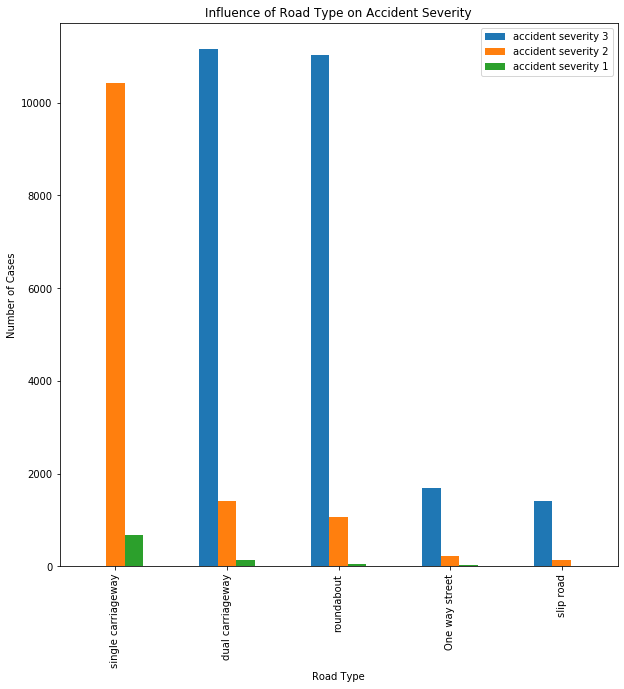

In [20]:
df_rtactot_mod.plot(kind='bar', figsize=(10, 10))

plt.xlabel('Road Type')
plt.ylabel('Number of Cases')
plt.title('Influence of Road Type on Accident Severity')
plt.show()